# Flower Recognition

Given the images of different types of flowers, we have to classify them according to their type.

In [1]:
# import all required libraries for reading, analysing and visualizing data
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

import os
import random
import cv2
from tqdm import tqdm

## Load the dataset

Type of flowers in our dataset - 
* Daisy
* Dandelion
* Rose
* Sunflower
* Tulip

In [2]:
labels = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
IMG_SIZE = 124

In [3]:
# load all the images
def loadData(DIR):
    X = []
    Y = []
    for label in labels:
        path = os.path.join(DIR, label)
        class_num = labels.index(label)
        for img in tqdm(os.listdir(path)):
            arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
            resized_arr = cv2.resize(arr, (IMG_SIZE, IMG_SIZE))
            X.append(resized_arr)
            Y.append(class_num)
    return (np.array(X), np.array(Y))

In [4]:
DIR = '../../../Large Datasets/FlowerRecog/flowers/'
(X, Y) = loadData(DIR)

100%|███████████████████████████████████████████████████████████████████████████████| 978/978 [00:04<00:00, 195.65it/s]


## Data Visualization

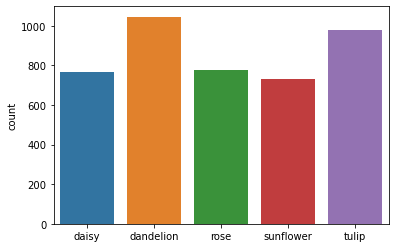

In [5]:
l = []
for img in Y:
    l.append(labels[img])
sns.countplot(l);

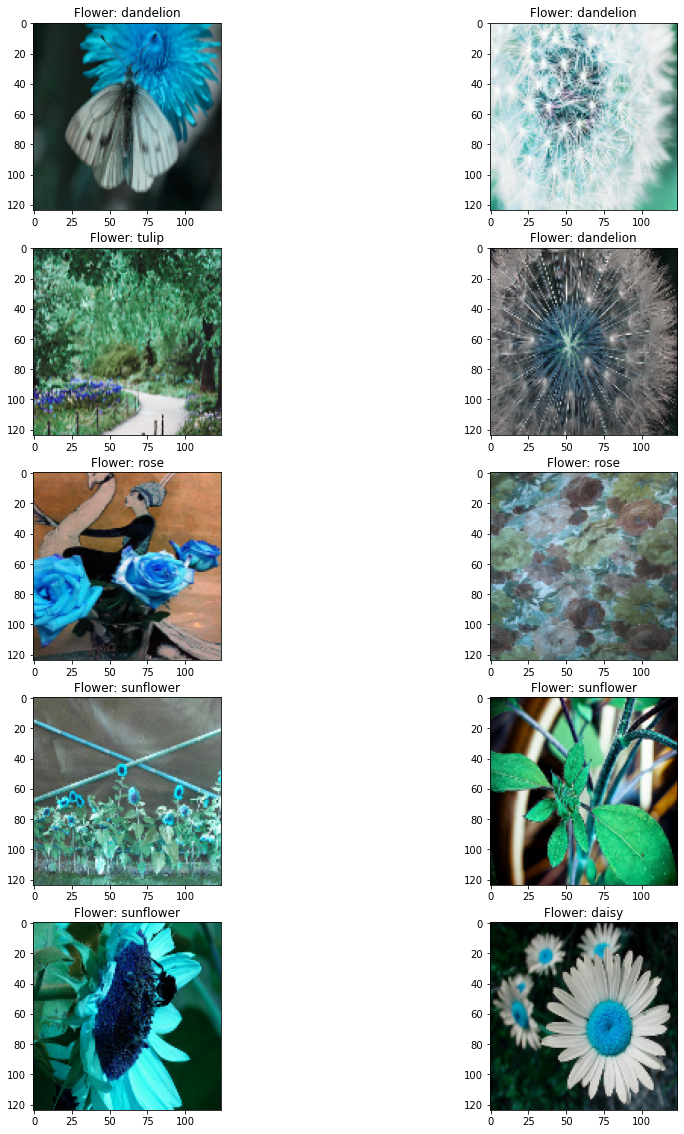

In [6]:
# any 10 random images
fig, ax = plt.subplots(5, 2)
fig.set_size_inches(15, 20)
for i in range(5):
    for j in range(2):
        l = random.randint(0, len(X))
        ax[i, j].imshow(X[l])
        ax[i, j].set_title('Flower: ' + labels[Y[l]])

## Preprocessing of data

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [8]:
# normalize the data
X = X / 255

# reshape the data
X = X.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
Y = Y.reshape(-1, 1)
Y = keras.utils.to_categorical(Y, 5)

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

# Explore the dataset
print("X_train shape:" + str(X_train.shape))
print("Y_train shape:" + str(Y_train.shape))
print("X_test shape:" + str(X_test.shape))
print("Y_test shape:" + str(Y_test.shape))

X_train shape:(3008, 124, 124, 3)
Y_train shape:(3008, 5)
X_test shape:(1290, 124, 124, 3)
Y_test shape:(1290, 5)


## CNN Model from scratch

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten
from keras.layers import Dense

In [11]:
model = Sequential(
    [
        Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', input_shape = (IMG_SIZE, IMG_SIZE, 3)),
        MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
        
        Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu'),
        MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
        
        Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu'),
        MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
        
        Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', activation = 'relu'),
        MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
        
        Conv2D(filters = 512, kernel_size = (3, 3), padding = 'same', activation = 'relu'),
        MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
        
        Flatten(),
        Dense(1024, activation = 'relu'),
        Dropout(0.5),
        Dense(5, activation = 'softmax')
    ]
)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

In [13]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [14]:
history = model.fit(X_train, Y_train, epochs = 8, validation_split = 0.2)

Epoch 1/8
76/76 [==============================] - 69s 904ms/step - loss: 1.4647 - accuracy: 0.3329 - val_loss: 1.3546 - val_accuracy: 0.4037
Epoch 2/8
76/76 [==============================] - 64s 847ms/step - loss: 1.1586 - accuracy: 0.5216 - val_loss: 1.0210 - val_accuracy: 0.5864
Epoch 3/8
76/76 [==============================] - 65s 854ms/step - loss: 0.9662 - accuracy: 0.6076 - val_loss: 0.9385 - val_accuracy: 0.6229
Epoch 4/8
76/76 [==============================] - 65s 853ms/step - loss: 0.9034 - accuracy: 0.6380 - val_loss: 0.9864 - val_accuracy: 0.6329
Epoch 5/8
76/76 [==============================] - 64s 847ms/step - loss: 0.8659 - accuracy: 0.6584 - val_loss: 0.8497 - val_accuracy: 0.7027
Epoch 6/8
76/76 [==============================] - 64s 848ms/step - loss: 0.7812 - accuracy: 0.6970 - val_loss: 0.8996 - val_accuracy: 0.6545
Epoch 7/8
76/76 [==============================] - 65s 853ms/step - loss: 0.7121 - accuracy: 0.7340 - val_loss: 0.8927 - val_accuracy: 0.6678
Epoch 

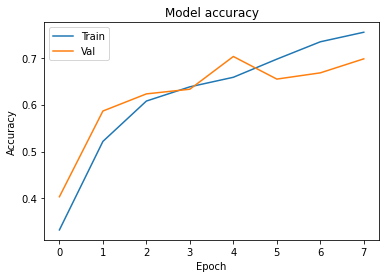

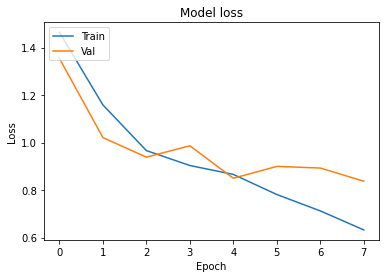

In [15]:
# plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

# plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

In [16]:
# find the accuracy on train and test set
train_loss, train_acc = model.evaluate(X_train, Y_train)
test_loss, test_acc = model.evaluate(X_test, Y_test)
print("Accuracy on train set is %f" %(train_acc * 100)  + "%")
print("Accuracy on test set is %f" %(test_acc * 100)  + "%")

41/41 [==============================] - 9s 211ms/step - loss: 0.8846 - accuracy: 0.6814
Accuracy on train set is 77.094418%
Accuracy on validation set is 68.139535%


## Using pre-trained VGG19 model

In [17]:
from keras.applications import VGG19

In [18]:
pre_trained_model = VGG19(input_shape = (IMG_SIZE, IMG_SIZE, 3), include_top = False, weights = 'imagenet')

for layer in pre_trained_model.layers[:19]:
    layer.trainable = False

model = Sequential(
    [
        pre_trained_model,
        Flatten(),
        Dense(5, activation = 'softmax')
    ]
)

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 3, 3, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 23045     
Total params: 20,047,429
Trainable params: 4,742,661
Non-trainable params: 15,304,768
_________________________________________________________________


In [20]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [21]:
history = model.fit(X_train, Y_train, epochs = 6, validation_split = 0.2)

Epoch 1/6
76/76 [==============================] - 291s 4s/step - loss: 0.9511 - accuracy: 0.6463 - val_loss: 0.7420 - val_accuracy: 0.7392
Epoch 2/6
76/76 [==============================] - 290s 4s/step - loss: 0.4847 - accuracy: 0.8121 - val_loss: 0.6709 - val_accuracy: 0.7674
Epoch 3/6
76/76 [==============================] - 291s 4s/step - loss: 0.3372 - accuracy: 0.8815 - val_loss: 0.6278 - val_accuracy: 0.8056
Epoch 4/6
76/76 [==============================] - 291s 4s/step - loss: 0.2688 - accuracy: 0.9027 - val_loss: 0.5342 - val_accuracy: 0.8455
Epoch 5/6
76/76 [==============================] - 292s 4s/step - loss: 0.1537 - accuracy: 0.9493 - val_loss: 0.7766 - val_accuracy: 0.7990
Epoch 6/6
76/76 [==============================] - 290s 4s/step - loss: 0.0708 - accuracy: 0.9817 - val_loss: 0.8783 - val_accuracy: 0.7990


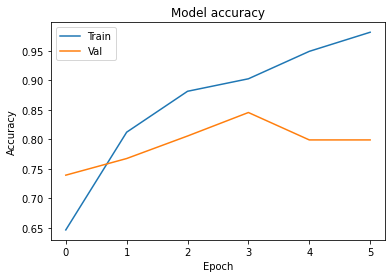

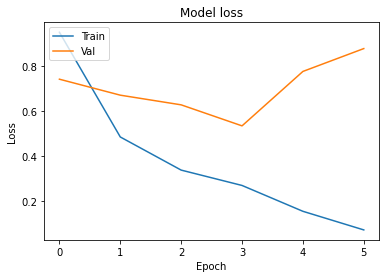

In [22]:
# plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

# plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

In [23]:
# find the accuracy on train and test set
train_loss, train_acc = model.evaluate(X_train, Y_train)
test_loss, test_acc = model.evaluate(X_test, Y_test)
print("Accuracy on train set is %f" %(train_acc * 100)  + "%")
print("Accuracy on validation set is %f" %(test_acc * 100)  + "%")

41/41 [==============================] - 113s 3s/step - loss: 0.9511 - accuracy: 0.8008
Accuracy on train set is 94.215423%
Accuracy on validation set is 80.077517%


## Visualizing the predictions

In [24]:
Y_pred = model.predict(X_test)
Y_pred = np.argmax(Y_pred, axis = 1)
Y_test = np.argmax(Y_test, axis = 1)

# get the correctly and incorrectly labelled images
correct = np.nonzero(Y_pred == Y_test)[0]
incorrect = np.nonzero(Y_pred != Y_test)[0]

print("correct shape:" + str(correct.shape))
print("incorrect shape:" + str(incorrect.shape))

# Classification Report
print(classification_report(Y_test, Y_pred))

correct shape:(1033,)
incorrect shape:(257,)
              precision    recall  f1-score   support

           0       0.66      0.92      0.77       249
           1       0.91      0.81      0.86       298
           2       0.83      0.70      0.76       228
           3       0.80      0.87      0.83       215
           4       0.86      0.72      0.78       300

    accuracy                           0.80      1290
   macro avg       0.81      0.80      0.80      1290
weighted avg       0.82      0.80      0.80      1290



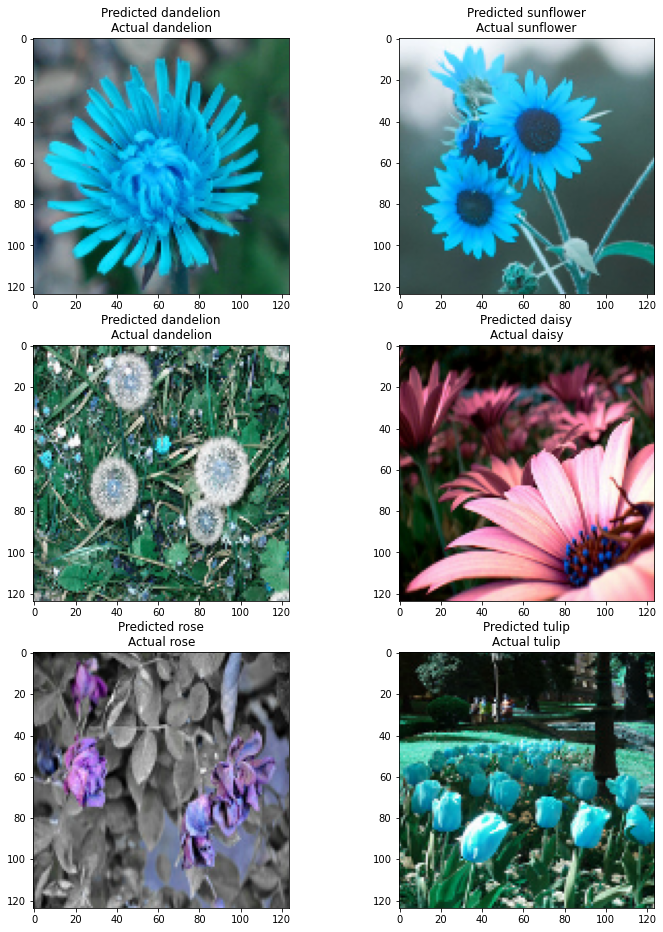

In [25]:
# subset of correcly predicted images
fig, ax = plt.subplots(3, 2)
fig.set_size_inches(12, 16)
cur = 0
for i in range(3):
    for j in range(2):
        ax[i, j].imshow(X_test[correct[cur]])
        ax[i, j].set_title("Predicted {}\nActual {}".format(labels[Y_pred[correct[cur]]], labels[Y_test[correct[cur]]]))
        cur = cur + 1

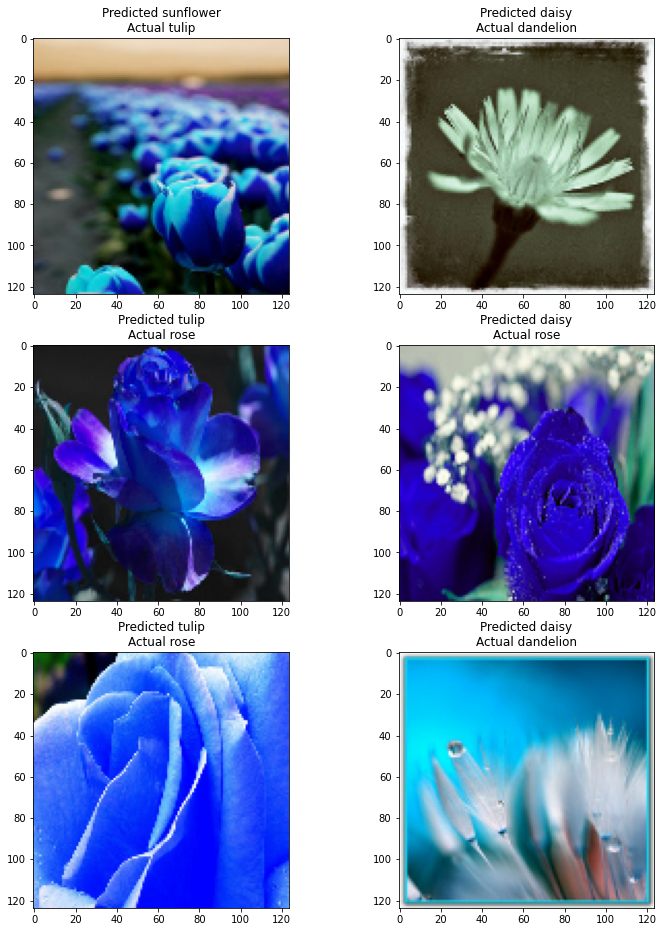

In [26]:
# subset of incorrecly predicted images
fig, ax = plt.subplots(3, 2)
fig.set_size_inches(12, 16)
cur = 0
for i in range(3):
    for j in range(2):
        ax[i, j].imshow(X_test[incorrect[cur]])
        ax[i, j].set_title("Predicted {}\nActual {}".format(labels[Y_pred[incorrect[cur]]], labels[Y_test[incorrect[cur]]]))
        cur = cur + 1